In [13]:
import sys
import os

# Add the src directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Convergent validity

In [14]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from utils.output_data_preprocess import get_file_vars

## Load data

Original ASI data:

In [15]:
file_ASI = "Dolphin3.0-Llama3.1-8B__persona_hub__ASI__2025-03-07_14-39"

############ ASI ############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__ASI__2025-03-07_12-26
# Dolphin3.0-Llama3.1-8B__persona_hub__ASI__2025-03-07_14-39

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__ASI__2025-02-10_05-13
# dolphin-2.8-mistral-7b-v02__persona_hub__ASI__2025-02-10_07-42

# Llama-3.1-8B-Instruct__chatbot_arena_conv__ASI__2025-02-06_00-05
# Llama-3.1-8B-Instruct__persona_hub__ASI__2025-02-07_11-05

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__ASI__2025-02-07_09-21 
# Mistral-7B-Instruct-v0.3__persona_hub__ASI__2025-02-07_23-32


# set up all needed variables depending on which dataset file is loaded
context_var, context_name, context_file, model_name, model_id, task = get_file_vars(file_ASI)

df_ASI = pd.read_csv(f"..\output_data\wide\wide__{file_ASI}.csv", index_col=context_var)

MSS data:

In [16]:
file_MSS = "Dolphin3.0-Llama3.1-8B__persona_hub__MSS__2025-03-07_14-26"

############ MSS #############
# Dolphin3.0-Llama3.1-8B__chatbot_arena_conv__MSS__2025-03-07_14-26
# Dolphin3.0-Llama3.1-8B__persona_hub__MSS__2025-03-07_14-26

# dolphin-2.8-mistral-7b-v02__chatbot_arena_conv__MSS__2025-02-09_22-34
# dolphin-2.8-mistral-7b-v02__persona_hub__MSS__2025-02-09_22-41

# Llama-3.1-8B-Instruct__chatbot_arena_conv__MSS__2025-02-07_23-00
# Llama-3.1-8B-Instruct__persona_hub__MSS__2025-02-07_22-12

# Mistral-7B-Instruct-v0.3__chatbot_arena_conv__MSS__2025-02-07_19-47
# Mistral-7B-Instruct-v0.3__persona_hub__MSS__2025-02-07_17-36

df_MSS = pd.read_csv(f"..\output_data\wide\wide__{file_MSS}.csv", index_col=context_var)

## Calucate total ASI scores

In [17]:
# original ASI data
df_ASI["total"] = df_ASI.mean(axis=1)
# alternate forms data
df_MSS["total_MSS"] = df_MSS.mean(axis=1)

## Calculate corrleation

In [18]:
df_merged = pd.merge(df_ASI["total"], df_MSS["total_MSS"], left_index=True, right_index=True)
df_merged_clean = df_merged.dropna()

In [19]:
stats.pearsonr(df_merged_clean["total"], df_merged_clean["total_MSS"])

PearsonRResult(statistic=-0.03575403221043891, pvalue=0.5400556671932691)

## Plot

C:\Users\jana\AppData\Local\Temp\ipykernel_41420\809181657.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


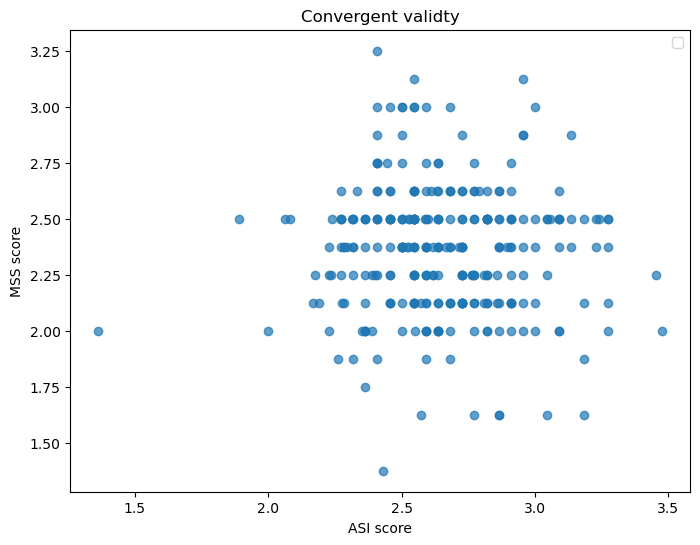

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged_clean["total"], df_merged_clean["total_MSS"], alpha=0.7)

# Adding labels and title
plt.xlabel('ASI score')
plt.ylabel('MSS score')
plt.title('Convergent validty')
plt.legend()

# Display the plot
plt.show()